In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_raw=pd.read_csv('../data/Train.csv')
train_fft=pd.read_csv("../data/train_fft.csv")

In [3]:
# covert features  fron string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_raw[feature]=train_raw[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])

In [4]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_fft[feature]=train_fft[feature].apply(lambda x: x[1:-1])

In [5]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train_fft[feature]=train_fft[feature].apply(lambda x: [ float(X) for X in x.split(",")])

In [6]:
#setting humidity max to 1
def replace_to_one(x):
    if x > 1 :
        return 1.0
    else :
        return float(x)
features_max_one = ["rel_humidity"]
for feature in features_max_one : 
    train_fft[feature]=train_fft[feature].apply(lambda x: [replace_to_one(X) for X in x])

In [7]:
#compressing wind_dir to range [0,360]
def compress_wind_dir(x,x_min,x_max):
    if x_min < 0 and x_max > 360:
        return (x-x_min)*360/(x_max-x_min)
    elif x_min < 0 and x_max <= 360:
        return (x-x_min)*x_max/(x_max-x_min)
    elif x_min >= 0 and x_max > 360 :
        return x*360/x_max
    else :
        return float(x)
train_fft["wind_dir"] = train_fft["wind_dir"].apply(lambda x: [compress_wind_dir(X,min(x),max(x)) for X in x])

In [8]:
x = [i for i in range(0,121,1)]

In [9]:
sns.set_style('whitegrid')

## Precip

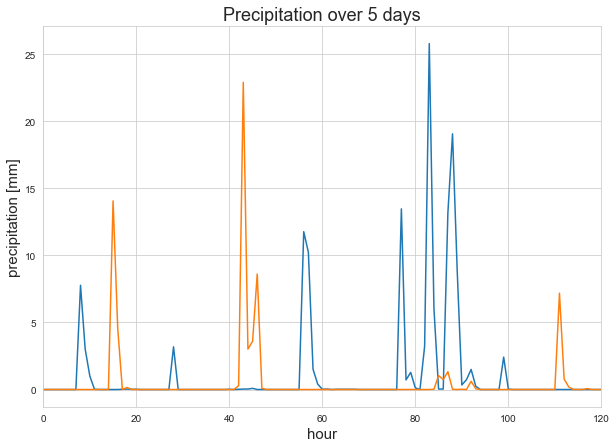

In [31]:
line, ax = plt.subplots(figsize = (10,7))
#sns.lineplot(x=x, y=train_raw.loc[1,'precip'])
#sns.lineplot(x=x, y=train_raw.loc[2,'precip'])
ax = sns.lineplot(x=x, y=train_raw.loc[3,'precip'])
#sns.lineplot(x=x, y=train_raw.loc[4,'precip'])
ax = sns.lineplot(x=x, y=train_raw.loc[5,'precip'])

ax.set_title('Precipitation over 5 days', fontsize = 18)
ax.set_ylabel('precipitation [mm]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/precipitation_raw.png')

## Other features

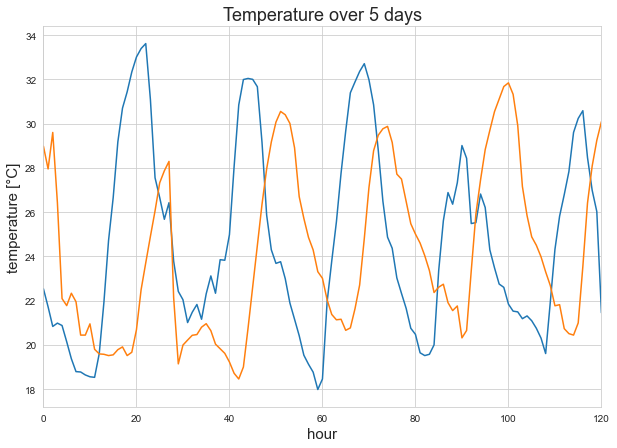

In [36]:
line, ax = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x=x, y=train_raw.loc[1,'temp'])
ax = sns.lineplot(x=x, y=train_raw.loc[2,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'temp'])
#sns.lineplot(x=x, y=train_raw.loc[4,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[5,'temp'])

ax.set_title('Temperature over 5 days', fontsize = 18)
ax.set_ylabel('temperature [°C]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/temperature_raw.png')

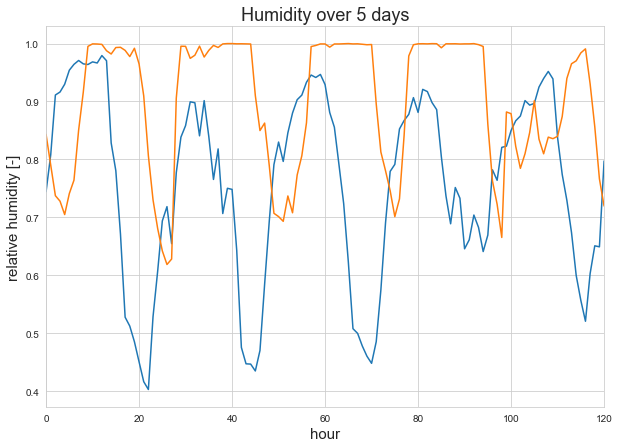

In [43]:
line, ax = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x=x, y=train_raw.loc[1,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[2,'rel_humidity'])
ax = sns.lineplot(x=x, y=train_raw.loc[3,'rel_humidity'])
#sns.lineplot(x=x, y=train_raw.loc[4,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[5,'rel_humidity'])

ax.set_title('Humidity over 5 days', fontsize = 18)
ax.set_ylabel('relative humidity [-]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/rel_humidity_raw.png')

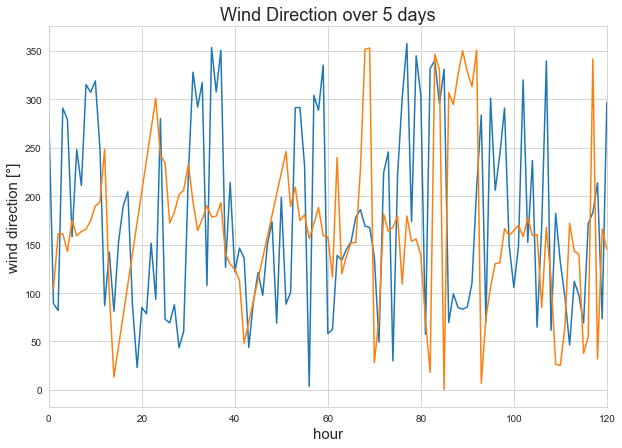

In [58]:
line, ax = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x=x, y=train_raw.loc[1,'wind_dir'])
#ax = sns.lineplot(x=x, y=train_raw.loc[2,'wind_dir'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'wind_dir'])
#sns.lineplot(x=x, y=train_raw.loc[4,'wind_dir'])
ax = sns.lineplot(x=x, y=train_raw.loc[5,'wind_dir'])
#ax = sns.lineplot(x=x, y=train_raw.loc[6,'wind_dir'])

ax.set_title('Wind Direction over 5 days', fontsize = 18)
ax.set_ylabel('wind direction [°]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_dir_raw.png')

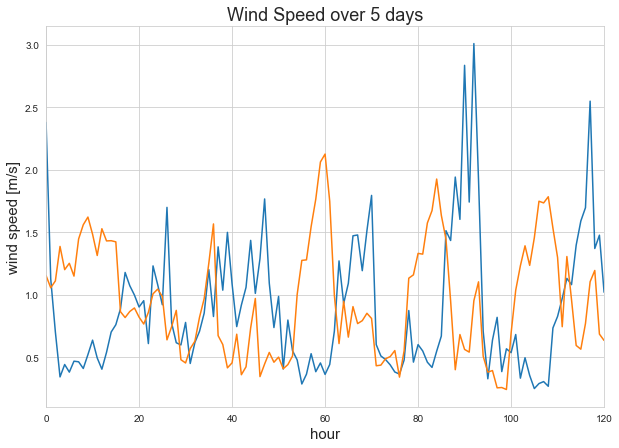

In [59]:
line, ax = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x=x, y=train_raw.loc[1,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[2,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'wind_spd'])
#sns.lineplot(x=x, y=train_raw.loc[4,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[5,'wind_spd'])
ax = sns.lineplot(x=x, y=train_raw.loc[6,'wind_spd'])

ax.set_title('Wind Speed over 5 days', fontsize = 18)
ax.set_ylabel('wind speed [m/s]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_spd_raw.png')

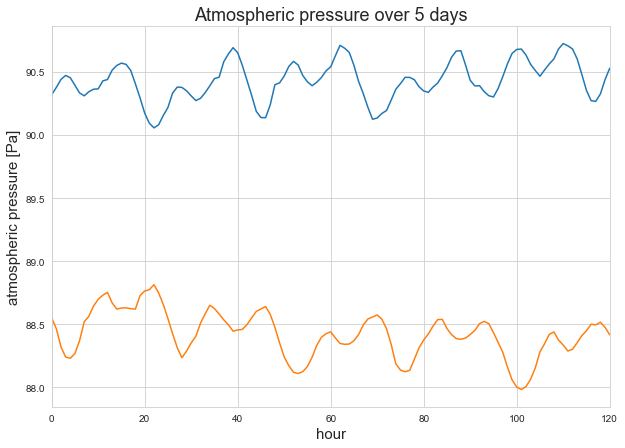

In [65]:
line, ax = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x=x, y=train_raw.loc[1,'atmos_press'])
ax = sns.lineplot(x=x, y=train_raw.loc[2,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'temp'])
#sns.lineplot(x=x, y=train_raw.loc[4,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[5,'temp'])

ax.set_title('Atmospheric pressure over 5 days', fontsize = 18)
ax.set_ylabel('atmospheric pressure [Pa]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/atmos_press_raw.png')

## features after fft

In [106]:
import math

y_raw = []
x_raw = []
for i, value in enumerate(train_raw.loc[17,'temp']):
    if not math.isnan(value):
        y_raw.append(value)
        x_raw.append(x[i])
print(x)
print(x_raw)
print(x_raw[:54])
print(x_raw[54:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,

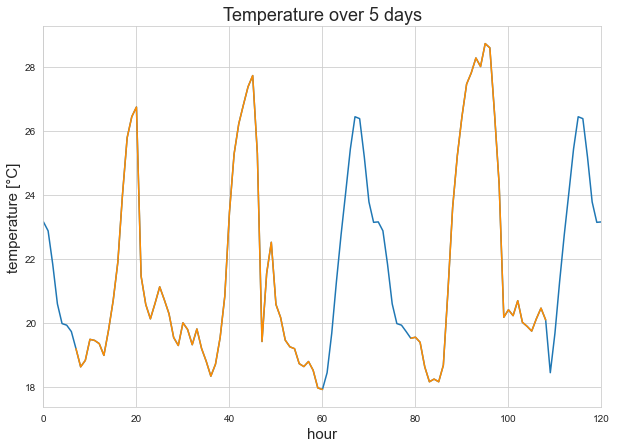

In [107]:
line, ax = plt.subplots(figsize = (10,7))
#ax = sns.lineplot(x=x, y=train_fft.loc[0,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[0,'temp'])
#ax = sns.lineplot(x=x, y=train_fft.loc[4,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[4,'temp'])
#ax = sns.lineplot(x=x, y=train_fft.loc[9,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[9,'temp'])
ax = sns.lineplot(x=x, y=train_fft.loc[17,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[17,'temp'])
ax = sns.lineplot(x=x_raw[:54], y=y_raw[:54], color='darkorange')
ax = sns.lineplot(x=x_raw[54:], y=y_raw[54:], color='darkorange')
#ax = sns.lineplot(x=x, y=train_fft.loc[57,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[57,'temp'])
#ax = sns.lineplot(x=x, y=train_fft.loc[99,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[99,'temp'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'temp'])

ax.set_title('Temperature over 5 days', fontsize = 18)
ax.set_ylabel('temperature [°C]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/temperature_fft.png')


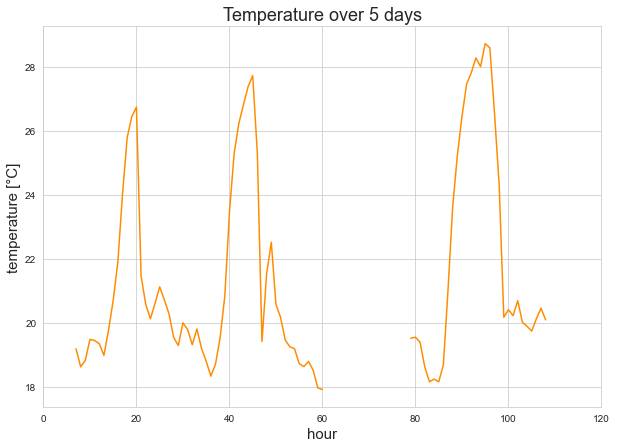

In [125]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x_raw[:54], y=y_raw[:54], color='darkorange')
ax = sns.lineplot(x=x_raw[54:], y=y_raw[54:], color='darkorange')

ax.set_title('Temperature over 5 days', fontsize = 18)
ax.set_ylabel('temperature [°C]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/temperature_bf_fft.png')

In [113]:
import math

y_raw_rel_humidity = []
x_raw_rel_humidity = []
for i, value in enumerate(train_raw.loc[17,'rel_humidity']):
    if not math.isnan(value):
        y_raw_rel_humidity.append(value)
        x_raw_rel_humidity.append(x[i])
#print(x)
print(x_raw_rel_humidity)
print(x_raw_rel_humidity[:14])
print(x_raw_rel_humidity[14:53])
print(x_raw_rel_humidity[53:])

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


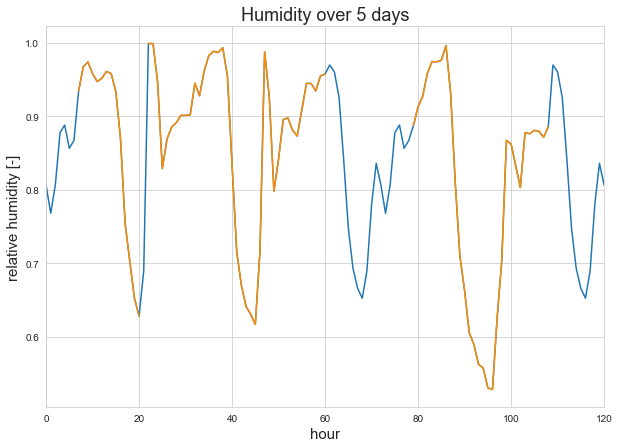

In [109]:
line, ax = plt.subplots(figsize = (10,7))
#ax = sns.lineplot(x=x, y=train_fft.loc[0,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[0,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_fft.loc[4,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[4,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_fft.loc[9,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[9,'rel_humidity'])
ax = sns.lineplot(x=x, y=train_fft.loc[17,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[17,'rel_humidity'])
ax = sns.lineplot(x=x_raw_rel_humidity[:14], y=y_raw_rel_humidity[:14], color='darkorange')
ax = sns.lineplot(x=x_raw_rel_humidity[14:53], y=y_raw_rel_humidity[14:53], color='darkorange')
ax = sns.lineplot(x=x_raw_rel_humidity[53:], y=y_raw_rel_humidity[53:], color='darkorange')
#ax = sns.lineplot(x=x, y=train_fft.loc[57,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[57,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_fft.loc[99,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[99,'rel_humidity'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'rel_humidity'])

ax.set_title('Humidity over 5 days', fontsize = 18)
ax.set_ylabel('relative humidity [-]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/rel_humidity_fft.png')

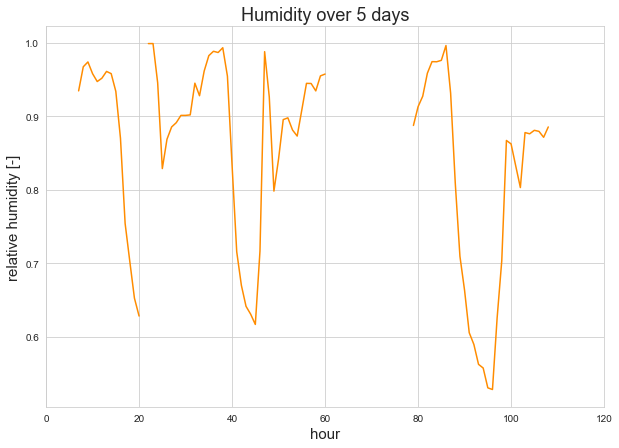

In [126]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x_raw_rel_humidity[:14], y=y_raw_rel_humidity[:14], color='darkorange')
ax = sns.lineplot(x=x_raw_rel_humidity[14:53], y=y_raw_rel_humidity[14:53], color='darkorange')
ax = sns.lineplot(x=x_raw_rel_humidity[53:], y=y_raw_rel_humidity[53:], color='darkorange')


ax.set_title('Humidity over 5 days', fontsize = 18)
ax.set_ylabel('relative humidity [-]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/rel_humidity_bf_fft.png')

In [114]:
y_raw_wind_dir = []
x_raw_wind_dir = []
for i, value in enumerate(train_raw.loc[17,'wind_dir']):
    if not math.isnan(value):
        y_raw_wind_dir.append(value)
        x_raw_wind_dir.append(x[i])
#print(x)
print(x_raw_wind_dir)
print(x_raw_wind_dir[:54])
print(x_raw_wind_dir[54:])

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


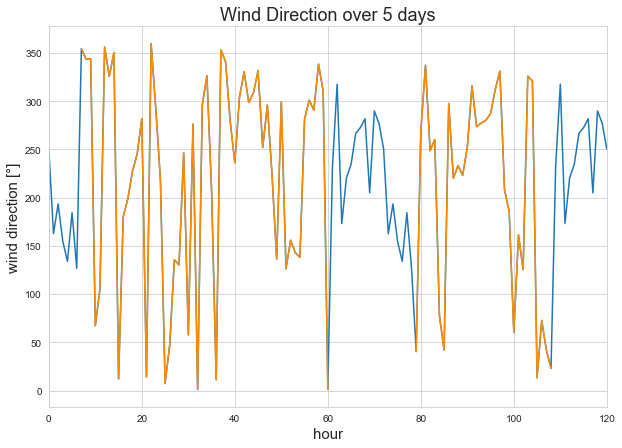

In [115]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x, y=train_fft.loc[17,'wind_dir'])
#ax = sns.lineplot(x=x, y=train_raw.loc[17,'wind_dir'])
ax = sns.lineplot(x=x_raw_wind_dir[:54], y=y_raw_wind_dir[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_wind_dir[54:], y=y_raw_wind_dir[54:], color='darkorange')

ax.set_title('Wind Direction over 5 days', fontsize = 18)
ax.set_ylabel('wind direction [°]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_dir_fft.png')

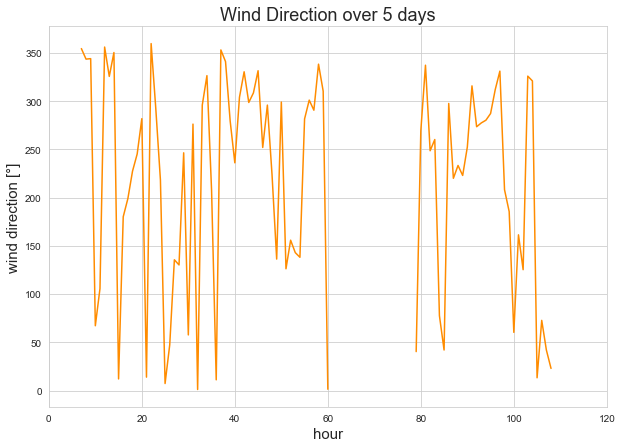

In [127]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x_raw_wind_dir[:54], y=y_raw_wind_dir[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_wind_dir[54:], y=y_raw_wind_dir[54:], color='darkorange')

ax.set_title('Wind Direction over 5 days', fontsize = 18)
ax.set_ylabel('wind direction [°]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_dir_bf_fft.png')

In [118]:
y_raw_wind_spd = []
x_raw_wind_spd = []
for i, value in enumerate(train_raw.loc[17,'wind_spd']):
    if not math.isnan(value):
        y_raw_wind_spd.append(value)
        x_raw_wind_spd.append(x[i])
#print(x)
print(x_raw_wind_spd)
print(x_raw_wind_spd[:54])
print(x_raw_wind_spd[54:])

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


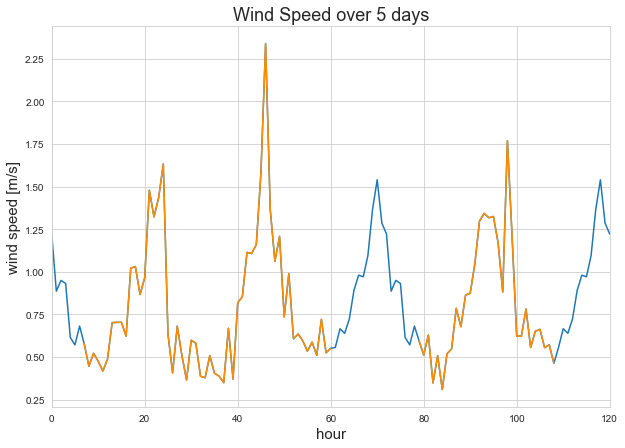

In [120]:
line, ax = plt.subplots(figsize = (10,7))
#ax = sns.lineplot(x=x, y=train_fft.loc[0,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[0,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_fft.loc[4,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[4,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_fft.loc[9,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[9,'wind_spd'])
ax = sns.lineplot(x=x, y=train_fft.loc[17,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[17,'wind_spd'])
ax = sns.lineplot(x=x_raw_wind_spd[:54], y=y_raw_wind_spd[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_wind_spd[54:], y=y_raw_wind_spd[54:], color='darkorange')
#ax = sns.lineplot(x=x, y=train_fft.loc[57,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[57,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_fft.loc[99,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[99,'wind_spd'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'wind_spd'])

ax.set_title('Wind Speed over 5 days', fontsize = 18)
ax.set_ylabel('wind speed [m/s]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_spd_fft.png')

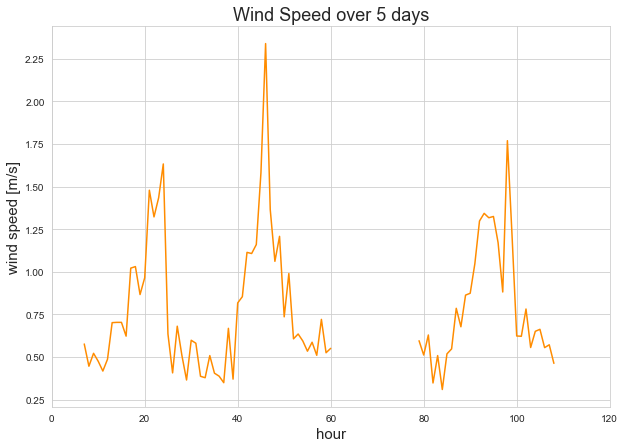

In [128]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x_raw_wind_spd[:54], y=y_raw_wind_spd[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_wind_spd[54:], y=y_raw_wind_spd[54:], color='darkorange')


ax.set_title('Wind Speed over 5 days', fontsize = 18)
ax.set_ylabel('wind speed [m/s]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/wind_spd_bf_fft.png')

In [123]:
y_raw_atmos_press = []
x_raw_atmos_press = []
for i, value in enumerate(train_raw.loc[17,'atmos_press']):
    if not math.isnan(value):
        y_raw_atmos_press.append(value)
        x_raw_atmos_press.append(x[i])
#print(x)
print(x_raw_atmos_press)
print(x_raw_atmos_press[:54])
print(x_raw_atmos_press[54:])

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]


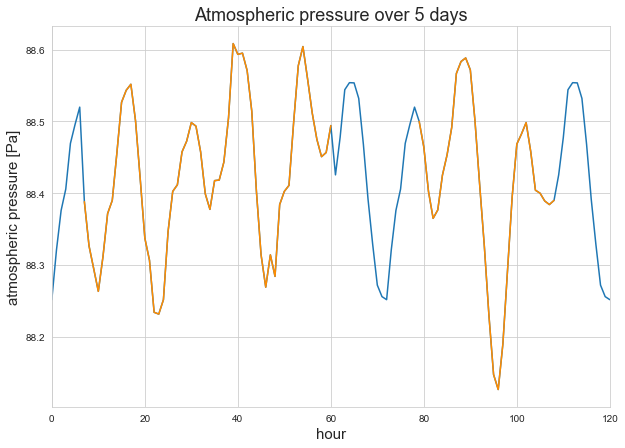

In [124]:
line, ax = plt.subplots(figsize = (10,7))
#ax = sns.lineplot(x=x, y=train_fft.loc[0,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[0,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_fft.loc[4,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[4,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_fft.loc[9,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[9,'atmos_press'])
ax = sns.lineplot(x=x, y=train_fft.loc[17,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[17,'atmos_press'])
ax = sns.lineplot(x=x_raw_atmos_press[:54], y=y_raw_atmos_press[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_atmos_press[54:], y=y_raw_atmos_press[54:], color='darkorange')
#ax = sns.lineplot(x=x, y=train_fft.loc[57,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[57,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_fft.loc[99,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[99,'atmos_press'])
#ax = sns.lineplot(x=x, y=train_raw.loc[3,'atmos_press'])

ax.set_title('Atmospheric pressure over 5 days', fontsize = 18)
ax.set_ylabel('atmospheric pressure [Pa]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/atmos_press_fft.png')

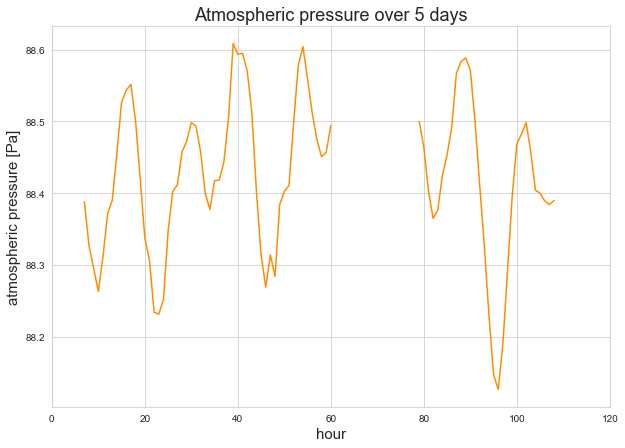

In [129]:
line, ax = plt.subplots(figsize = (10,7))

ax = sns.lineplot(x=x_raw_atmos_press[:54], y=y_raw_atmos_press[:54], color='darkorange')
ax = sns.lineplot(x=x_raw_atmos_press[54:], y=y_raw_atmos_press[54:], color='darkorange')

ax.set_title('Atmospheric pressure over 5 days', fontsize = 18)
ax.set_ylabel('atmospheric pressure [Pa]', fontsize = 15)
ax.set_xlabel('hour', fontsize = 15)

ax.set_xlim(left=0, right=120)
#ax.set_ylim(bottom=25, top=40)

line;
plt.savefig('../figures/atmos_press_bf_fft.png')